In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
dataset = pd.read_csv('../0_datasets/credit_data.csv')

In [3]:
dataset.shape

(2000, 5)

In [4]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

In [5]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
dataset.tail()

,i#clientid,income,age,loan,c#default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


c:\users\alisson\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


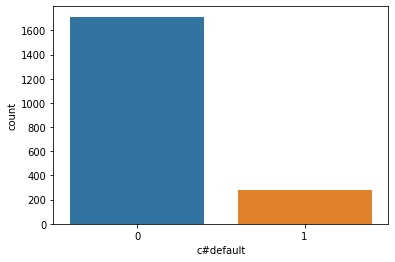

In [7]:
import seaborn as sns
sns.countplot(dataset['c#default']);

## Métodos de amostragem dados desbalanceados

### Naive Bayes

In [8]:
x = dataset.iloc[:, 1:4].values
x.shape

(1997, 3)

In [9]:
x

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [10]:
y = dataset.iloc[:, 4].values
y.shape

(1997,)

In [11]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y)

In [14]:
x_treinamento.shape, x_teste.shape, y_treinamento.shape, y_teste.shape

((1597, 3), (400, 3), (1597,), (400,))

In [15]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [16]:
print(f'{100 * 1714/len(dataset)}%, {100 * 283/len(dataset)}%')

85.82874311467201%, 14.171256885327992%


In [17]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [18]:
print(f'{100 * 1371/len(y_treinamento)}%, {100 * 226/len(y_treinamento)}%')

85.84846587351284%, 14.151534126487164%


In [19]:
np.unique(y_teste, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [20]:
print(f'{100 * 343/len(y_teste)}%, {100 * 57/len(y_teste)}%')

85.75%, 14.25%


In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
modelo = GaussianNB()
modelo.fit(x_treinamento, y_treinamento)

GaussianNB()

In [23]:
previsoes = modelo.predict(x_teste)

In [24]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [25]:
y_teste

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(previsoes, y_teste)

0.92

In [28]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[338,  27],
       [  5,  30]], dtype=int64)

<AxesSubplot:>

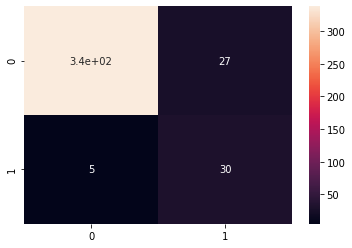

In [47]:
sns.heatmap(cm, annot=True)

In [31]:
(332+39)/(332+18+11+39)

0.9275

In [49]:
# Percentual de acerto para pessoas que pagam empréstimos
332/(332+18)

0.9485714285714286

In [50]:
# Percentual de acerto para pessoas que não pagam empréstimos
39/(39+11)

0.78

In [34]:
# Supondo que o prejuizo 5 mil R$ para cada pessoa que não pagar o empréstimo
# Numa base de dados de 1 mil pessoas não pagadores.
(1000 * (100 - 78) / 100) * 5000

1100000.0

## Undersampling

In [35]:
from imblearn.under_sampling import TomekLinks

In [36]:
tl = TomekLinks(sampling_strategy='majority')
x_under, y_under = tl.fit_resample(x, y)

In [37]:
x_under.shape, y_under.shape

((1897, 3), (1897,))

In [38]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [39]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [40]:
x_treinamento_under, x_teste_under, y_treinamento_under, y_teste_under = train_test_split(x_under, y_under, test_size=0.2, stratify=y_under)

In [41]:
x_treinamento_under.shape, x_teste_under.shape, y_treinamento_under.shape, y_teste_under.shape

((1517, 3), (380, 3), (1517,), (380,))

In [43]:
modelo_under = GaussianNB()
modelo_under.fit(x_treinamento_under, y_treinamento_under)
previsoes_under = modelo_under.predict(x_teste_under)
accuracy_score(previsoes_under, y_teste_under)

0.9289473684210526

In [45]:
cm_under = confusion_matrix(previsoes_under, y_teste_under)
cm_under

array([[316,  20],
       [  7,  37]], dtype=int64)

In [48]:
# Percentrual de acerto para pessoas que pagam empréstimos
316/(316+20)

0.9404761904761905

In [51]:
# Percentual de acerto para pessoas que não pagam empréstimos
37/(37+7)

0.8409090909090909